In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [103]:
data = pd.read_csv("iris.data")
data

,x1,x2,x3,x4,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [114]:
(data['class']).nunique()  #number of classes = 3, number of instances= 150, number of features = 4
(data['x4']).nunique()
data  = data.replace('Iris-versicolor', 1)
data = data.replace('Iris-setosa', 0)
X= data.iloc[0:100, [0,2]].values
Y = data.iloc[0:100, 4].values

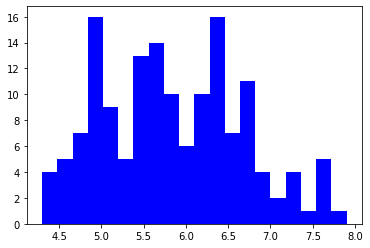

In [115]:
plt.hist(data['x1'], 20, facecolor='blue')
plt.show()

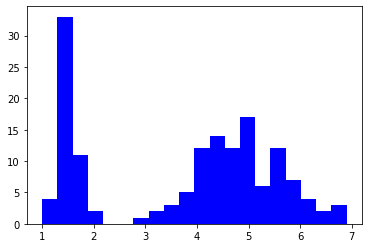

In [116]:
plt.hist(data['x3'], 20, facecolor='blue')
plt.show()

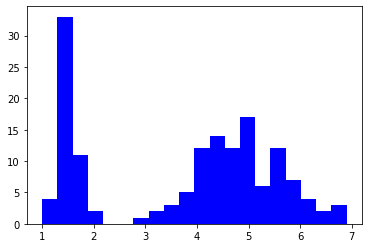

In [117]:
plt.hist(data['x3'], 20, facecolor='blue')
plt.show()

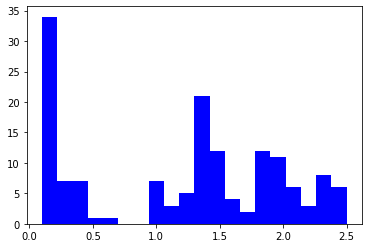

100

In [118]:
plt.hist(data['x4'], 20, facecolor='blue')
plt.show()
X.shape[0]


In [119]:
def loss_function(W,X,Y,lambd=0):
  loss = (1/X.shape[0])*(np.dot(-Y.T, np.log(sigmoid(X.dot(W.T))))- np.dot((1-Y).T ,np.log(1 -sigmoid(X.dot(W.T))))) + (lambd/2)*np.dot(W, W.T)
  return loss      

In [120]:
def sigmoid(z): 
  return 1.0/(1+np.exp(-z))

In [121]:
def gradient_descent(W, X, Y, learning_rate, lambd=0):
  N = X.shape[0]
  z = X.dot(W.T)
  Y_hat = sigmoid(z)
  der_weights = W
  der_weights[:,0]= np.zeros(W.shape[0])
  grad = (1/N)*(np.dot(X.T, (Y_hat-Y))) + (lambd)*der_weights.T
  W = W - learning_rate*grad.T

  return W

y_pred = np.round(predicted_classes)
y_true = Y
accuracy_score(y_true, y_pred)

In [296]:
def model(X, Y, features, epochs ,lambd=0): #features should be a list with the indexes of the features we want
  X = X[:,features]  
  X0 = np.ones((X.shape[0],1))
  X = np.concatenate((X0, X), axis = 1)
  learning_rates = [0.001,0.01,0.1, 0.2, 0.5]
  iterations = epochs
  W = np.random.normal(loc= 0.0, scale= 0.01, size=(1, X.shape[1]))
  model_output = {
      "Learning-rate": learning_rates[0],
      "minimum-loss": float(loss_function(W, X, Y, lambd)),
      "W": np.random.normal(loc= 0.0, scale= 0.01, size=(1, X.shape[1])),
      "epoch": 0
    }




  fig, (ax_loss, ax_accuracy) = plt.subplots(2,1, figsize = (15,15))
  for learning in learning_rates:
    loss = []
    accuracy = []
    np.random.seed(0)
    W = np.random.normal(loc= 0.0, scale= 0.01, size=(1, X.shape[1]))
    for i in range(iterations):
      compute_loss = float(loss_function(W, X, Y, lambd))

      loss.append(compute_loss)
      Y_pred = np.round(sigmoid(X.dot(W.T)))
      accuracy.append(accuracy_score(Y, Y_pred))
      W = gradient_descent(W, X, Y, learning, lambd)

      if(compute_loss < model_output["minimum-loss"]):
        model_output["Learning-rate"] = learning
        model_output["minimum-loss"] = compute_loss
        model_output["W"] = W
        model_output["epoch"] = i
  
    ax_loss.set_title("Loss function throught epochs")
    ax_loss.set_xlabel('EPOCHS')
    ax_loss.set_ylabel('LOSS')
    ax_loss.plot(np.arange(iterations),loss, label = "learning rate " + str(learning))
    ax_loss.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

    ax_accuracy.set_title("Plot Accuracy throught epochs")
    ax_accuracy.set_xlabel('EPOCHS')
    ax_accuracy.set_ylabel('ACCURACY')
    ax_accuracy.plot(np.arange(iterations),accuracy, label = "learning rate " + str(learning))
    ax_accuracy.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

  return model_output
   

# Initialization data

In [297]:
from sklearn.metrics import accuracy_score
(data['class']).nunique()  #number of classes = 3, number of instances= 150, number of features = 4
(data['x4']).nunique()
data  = data.replace('Iris-versicolor', 1)
data = data.replace('Iris-setosa', 0)

X = data.iloc[0:100,:-1 ].values
Y = data.iloc[0:100, -1].values
Y = (Y.reshape(100, 1))
Y   = Y.astype(np.float64)
epochs = 10000

{'Learning-rate': 0.5,
 'minimum-loss': 0.0005501377731983481,
 'W': array([[-2.41509224e-05, -4.34928204e+00,  8.72818131e+00]]),
 'epoch': 9999}

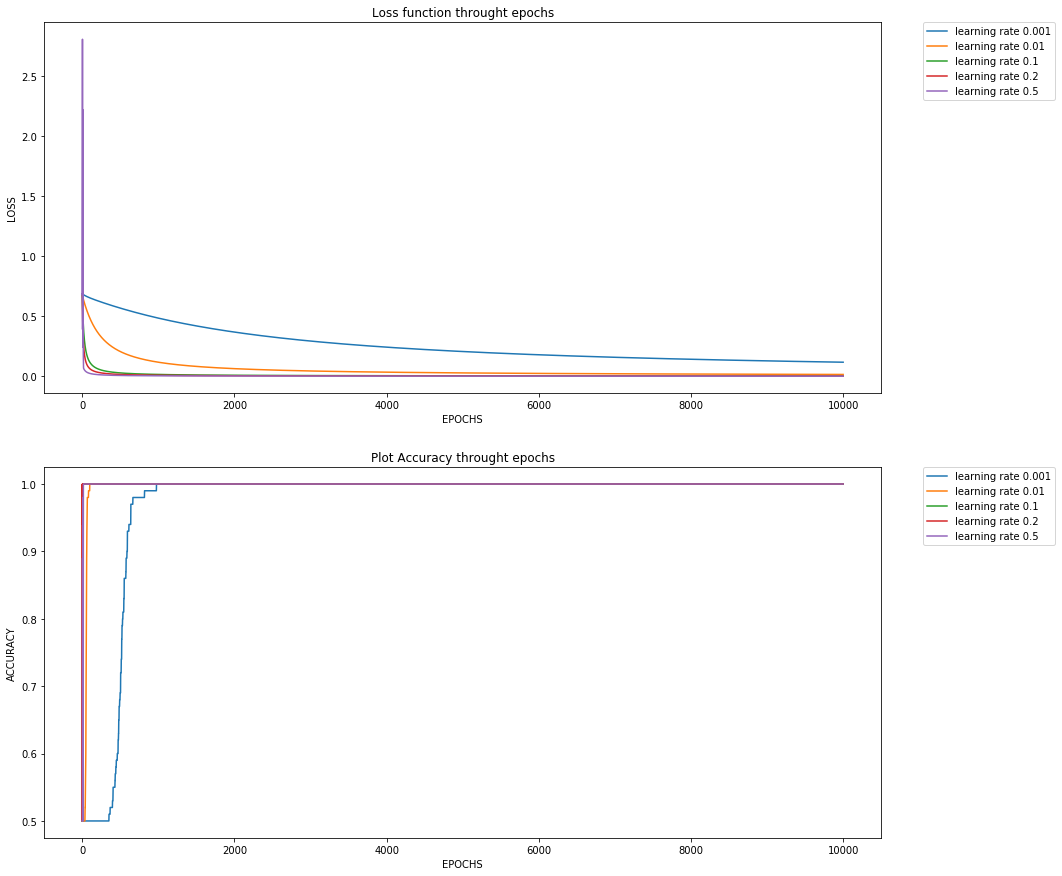

In [298]:
model(X, Y, [0, 2],epochs) # Without regolarization

{'Learning-rate': 0.5,
 'minimum-loss': 0.23008358281977792,
 'W': array([[ 0.        , -0.93331207,  1.8655197 ]]),
 'epoch': 419}

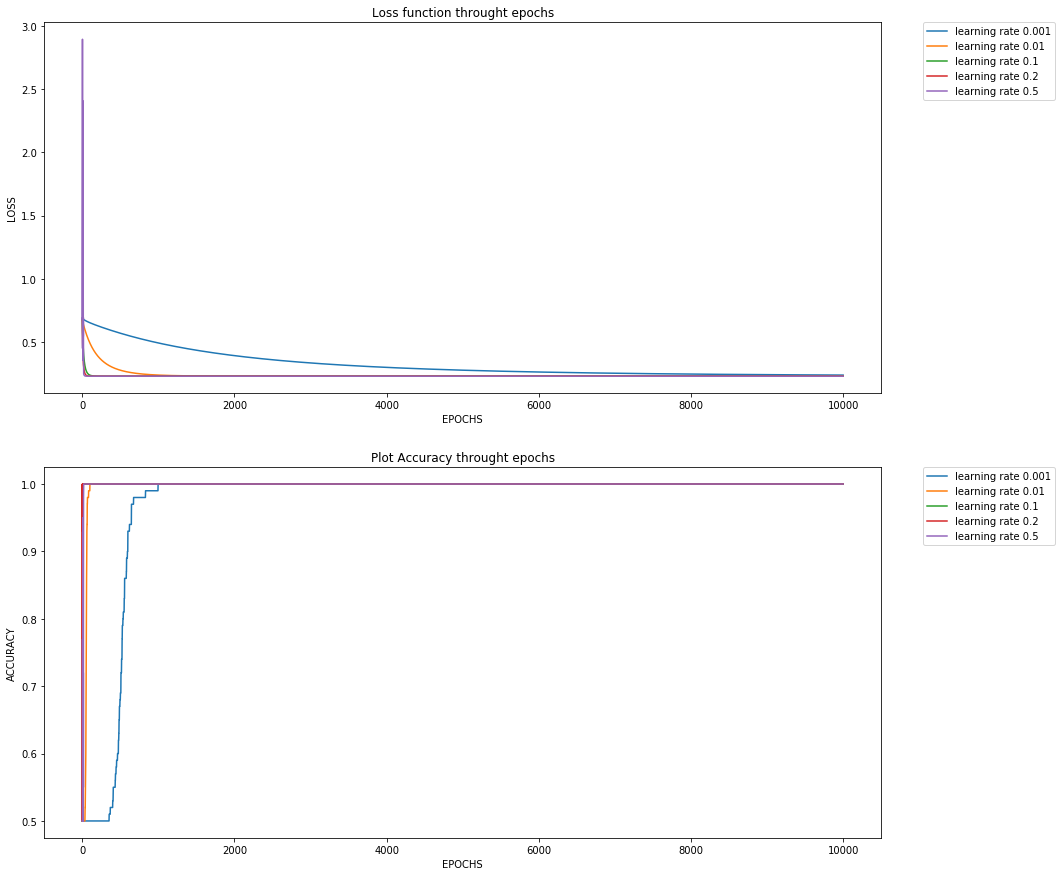

In [299]:
lamdb = 0.05
model(X, Y, [0,2], epochs, lamdb) # With regolarization

In [300]:
monk = pd.read_csv("monk2.csv")
monk

,x1,x2,x3,x4,x5,x6,class
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,2,2,1
3,1,1,1,1,3,1,1
4,1,1,1,1,3,2,1
5,1,1,1,1,4,1,0
6,1,1,1,1,4,2,0
7,1,1,1,2,1,1,1
8,1,1,1,2,1,2,1
9,1,1,1,2,2,1,1


In [330]:
X = monk.iloc[:,:-1].values
Y = monk.iloc[:,-1].values
Y = (Y.reshape(Y.shape[0], 1))
Y = Y.astype(np.float64)
W = np.random.normal(loc= 0.0, scale= 0.01, size=(1, X.shape[1])) 

In [331]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle = False)

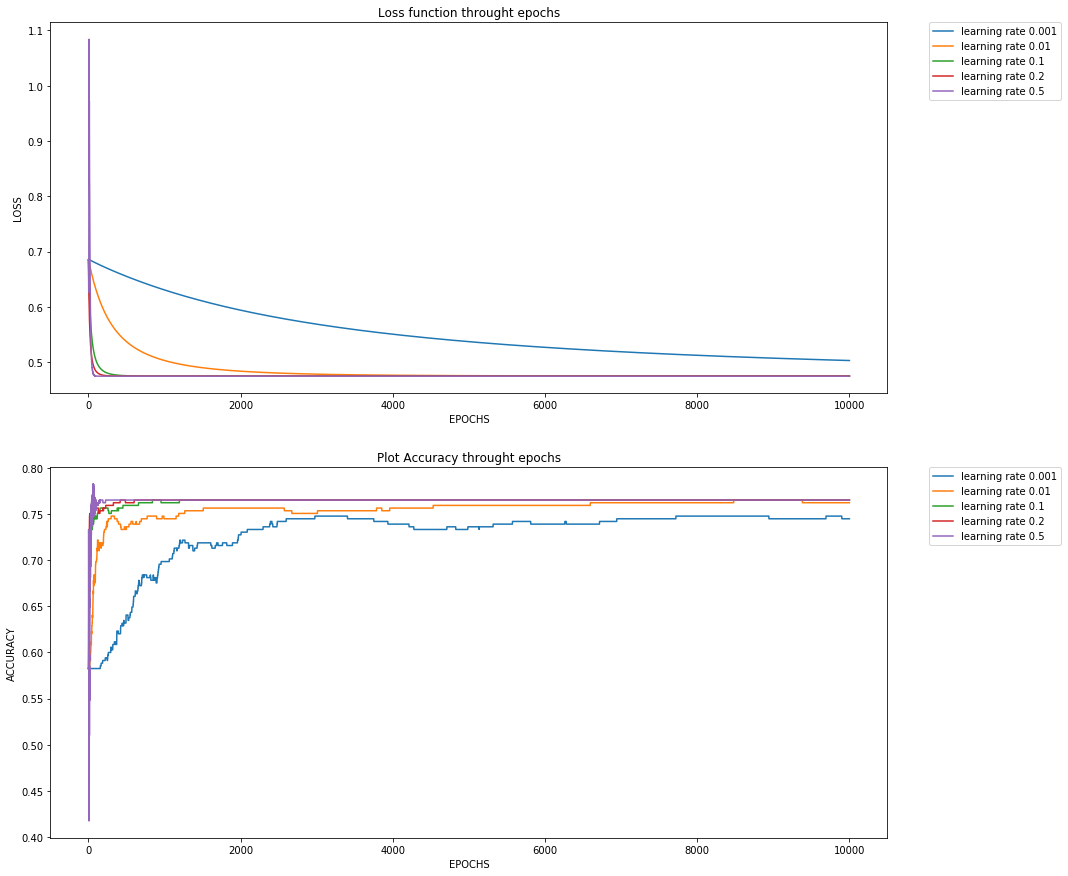

In [332]:
model_output = model(X_train, Y_train, [0,1,2,3,4,5], epochs)

In [333]:
model_output

{'Learning-rate': 0.5,
 'minimum-loss': 0.4748343248614146,
 'W': array([[ 0.        ,  0.81040782, -1.24638846,  0.97936754,  0.33882565,
         -0.92670224,  0.89931984]]),
 'epoch': 333}

In [334]:
X_train = X_train[:,[0,1,2,3,4,5]]  
X0_test = np.ones((X_train.shape[0],1))
X_train = np.concatenate((X0_test, X_train), axis = 1)

In [335]:
Y_pred = np.round(sigmoid(X_train.dot(model_output["W"].T)))
accuracy_score(Y_train, Y_pred)

0.7652173913043478

In [336]:
X_test = X_test[:,[0,1,2,3,4,5]]  
X0_test = np.ones((X_test.shape[0],1))
X_test = np.concatenate((X0_test, X_test), axis = 1)

In [337]:
Y_pred = np.round(sigmoid(X_test.dot(model_output["W"].T)))
accuracy_score(Y_test, Y_pred)

0.6436781609195402

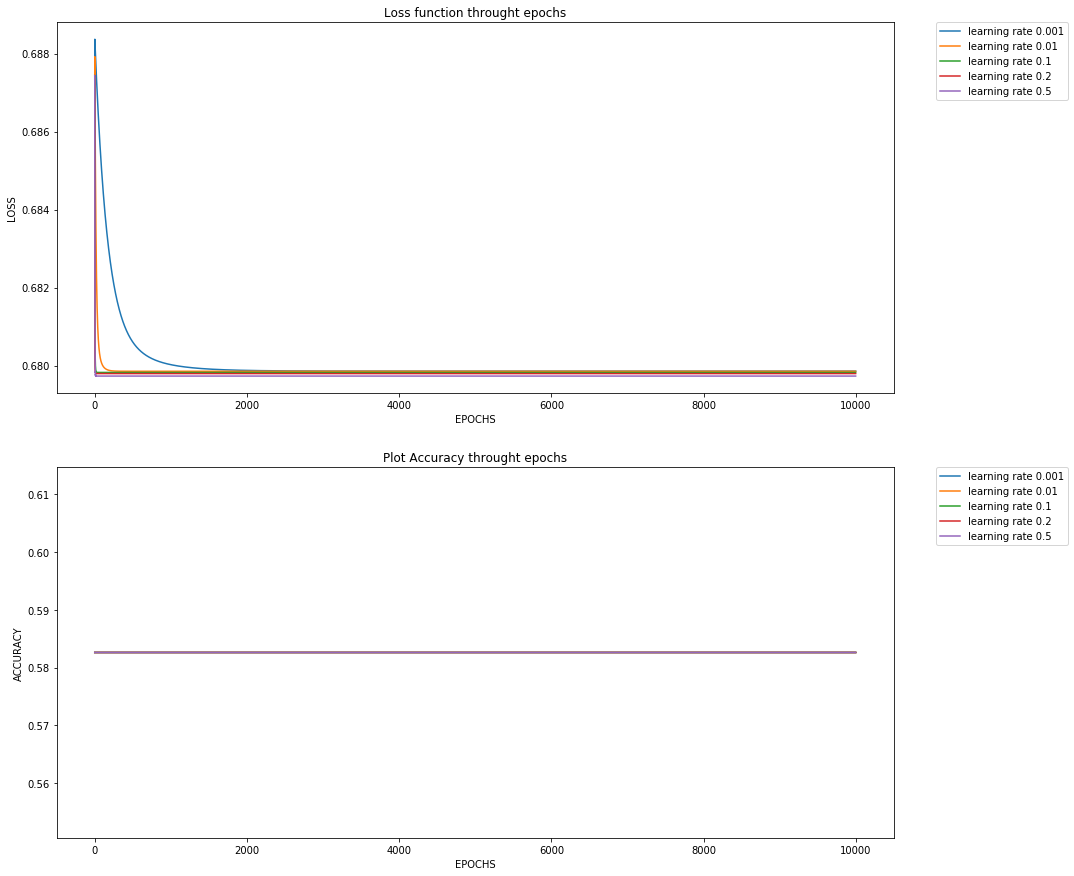

In [360]:
X = monk.iloc[:,:-1].values
Y = monk.iloc[:,-1].values
Y = (Y.reshape(Y.shape[0], 1))
Y = Y.astype(np.float64)
W = np.random.normal(loc= 0.0, scale= 0.01, size=(1, X.shape[1])) 
lambd = 1
model_output_reg = model(X_train, Y_train, [0,1,2,3,4,5], epochs, lambd)

In [361]:
model_output_reg

{'Learning-rate': 0.5,
 'minimum-loss': 0.6797275890637526,
 'W': array([[0.        , 0.01790662, 0.01790671, 0.0179069 , 0.01790685,
         0.01790641, 0.0842948 ]]),
 'epoch': 15}

In [356]:
X_train = X_train[:,[0,1,2,3,4,5]]  
X0_test = np.ones((X_train.shape[0],1))
X_train = np.concatenate((X0_test, X_train), axis = 1)

In [357]:
Y_pred = np.round(sigmoid(X_train.dot(model_output_reg["W"].T)))
accuracy_score(Y_train, Y_pred)

0.7188405797101449

In [358]:
X_test = X_test[:,[0,1,2,3,4,5]]  
X0_test = np.ones((X_test.shape[0],1))
X_test = np.concatenate((X0_test, X_test), axis = 1)

In [359]:
Y_pred = np.round(sigmoid(X_test.dot(model_output_reg["W"].T)))
accuracy_score(Y_test, Y_pred)

0.41379310344827586